In [104]:
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import warnings

In [105]:
parquetDf = pq.ParquetDataset('data/')
eventsDf = parquetDf.read().to_pandas()

Explore sample data
We will sample randomly 1M rows and look at different areas.

In [106]:
sampleEventsDf = eventsDf.head(n=1000000)
sampleEventsDf.head(50)

,sessionId,aid,type
ts,,,
2022-07-31 22:00:00.025,0,1517085,clicks
2022-07-31 22:01:44.511,0,1563459,clicks
2022-08-01 15:23:59.426,0,1309446,clicks
2022-08-01 15:28:39.997,0,16246,clicks
2022-08-01 15:31:11.344,0,1781822,clicks
2022-08-01 15:31:25.796,0,1152674,clicks
2022-08-01 16:04:53.840,0,1649869,carts
2022-08-01 16:04:58.050,0,461689,carts
2022-08-01 16:07:07.105,0,305831,orders


In [107]:
nEvents = len(sampleEventsDf)
actionFreq = ((sampleEventsDf.groupby(['type']).size() / nEvents) * 100).round(2)
print(actionFreq)

type
carts      7.10
clicks    91.04
orders     1.86
dtype: float64


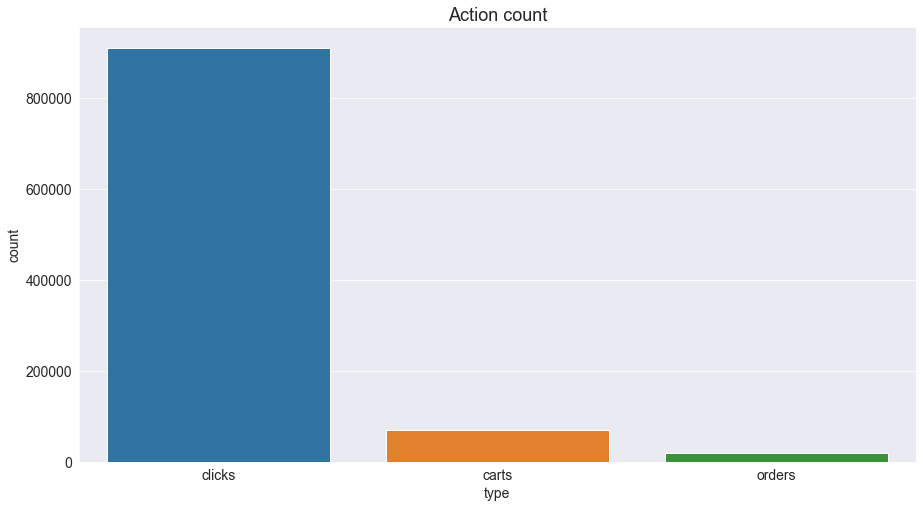

In [108]:
plt.figure(figsize=(15,8))
plt.title('Action count',fontsize=18)
b = sns.countplot(x=sampleEventsDf['type'])
b.set_xlabel('type',fontsize=14)
b.set_ylabel('count',fontsize=14)
b.tick_params(labelsize=14)


Distribution of number of actions performed in events --> list comprehension

In [117]:
listofactions = [i for i in sampleEventsDf.groupby(['sessionId']).size()]
print(listofactions)

pd.Series(listofactions).describe()


[276, 32, 33, 226, 19, 15, 204, 23, 4, 7, 6, 93, 5, 81, 382, 86, 12, 91, 26, 112, 7, 372, 14, 108, 108, 261, 43, 7, 292, 76, 24, 6, 126, 88, 115, 231, 213, 267, 151, 185, 310, 123, 129, 3, 151, 3, 24, 63, 376, 230, 188, 36, 235, 112, 45, 348, 149, 33, 21, 33, 26, 127, 29, 28, 5, 59, 16, 56, 50, 53, 6, 93, 31, 283, 141, 6, 47, 8, 46, 164, 272, 143, 192, 163, 43, 23, 2, 61, 82, 443, 79, 157, 68, 35, 326, 120, 58, 11, 33, 57, 29, 209, 256, 110, 172, 57, 24, 6, 205, 6, 3, 13, 22, 81, 21, 18, 4, 6, 26, 22, 110, 82, 59, 31, 135, 112, 35, 28, 234, 167, 9, 72, 105, 34, 273, 39, 19, 265, 2, 8, 116, 2, 6, 187, 5, 266, 63, 27, 217, 109, 241, 8, 125, 20, 17, 2, 102, 147, 180, 228, 37, 20, 3, 105, 2, 15, 2, 147, 75, 21, 4, 53, 297, 3, 42, 181, 147, 9, 8, 11, 197, 5, 326, 120, 363, 17, 49, 9, 2, 17, 104, 149, 156, 5, 97, 5, 301, 50, 4, 109, 381, 3, 11, 247, 147, 44, 17, 12, 23, 102, 8, 34, 119, 2, 2, 312, 8, 4, 24, 58, 8, 218, 9, 85, 7, 5, 62, 300, 43, 43, 3, 174, 82, 10, 8, 218, 15, 44, 22, 129, 36

count    17371.00000
mean        57.56721
std         81.79295
min          2.00000
25%          7.00000
50%         22.00000
75%         72.00000
max        495.00000
dtype: float64

In [118]:
nbins=25
px.histogram(listofactions,nbins=nbins,title=f"Number of events per sessionId - bins = {nbins}")

Insights:
* Range of events per session = [2 , 495]
* mean is at 58 actions
* standar deviation is at 82 actions.

-----
* carts      7.10 %
* clicks    91.04 %
* orders     1.86 %




In [111]:
"""aidsGrouped = sampleEventsDf.groupby(['aid', 'type'])['aid', 'type'].count()
aidsClicks = aidsGrouped[aidsGrouped['type'] == 'clicks']
aidsCarts = aidsGrouped[aidsGrouped['type'] == 'carts']
aidsOrders = aidsGrouped[aidsGrouped['type'] == 'orders']
#EVENT DATA
nevents = len(sampleEventsDf)
types = pd.unique(sampleEventsDf['type'])
nAids = len(aidsGrouped)
print("Events:", nevents, "Types:", types, 'NProducts:', nAids)
clicksEv = eventsDf[sampleEventsDf['type'] == 'clicks'].shape[0]
cartsEv = eventsDf[sampleEventsDf['type'] == 'carts'].shape[0]
ordersEv = eventsDf[sampleEventsDf['type'] == 'orders'].shape[0]

print("ClicksEvents:", clicksEv, str((clicksEv/nevents)*100))
print("CartsEvents:", cartsEv, str((cartsEv/nevents)*100))
print("OrdersEvents:", ordersEv, str((ordersEv/nevents)*100))
"""



'aidsGrouped = sampleEventsDf.groupby([\'aid\', \'type\'])[\'aid\', \'type\'].count()\naidsClicks = aidsGrouped[aidsGrouped[\'type\'] == \'clicks\']\naidsCarts = aidsGrouped[aidsGrouped[\'type\'] == \'carts\']\naidsOrders = aidsGrouped[aidsGrouped[\'type\'] == \'orders\']\n#EVENT DATA\nnevents = len(sampleEventsDf)\ntypes = pd.unique(sampleEventsDf[\'type\'])\nnAids = len(aidsGrouped)\nprint("Events:", nevents, "Types:", types, \'NProducts:\', nAids)\nclicksEv = eventsDf[sampleEventsDf[\'type\'] == \'clicks\'].shape[0]\ncartsEv = eventsDf[sampleEventsDf[\'type\'] == \'carts\'].shape[0]\nordersEv = eventsDf[sampleEventsDf[\'type\'] == \'orders\'].shape[0]\n\nprint("ClicksEvents:", clicksEv, str((clicksEv/nevents)*100))\nprint("CartsEvents:", cartsEv, str((cartsEv/nevents)*100))\nprint("OrdersEvents:", ordersEv, str((ordersEv/nevents)*100))\n'